# Разработка A/B-тестирования и анализ результатов для приложения с бесконечной лентой

## Описание данных

Таблицы:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.



Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


### Цель и план работы
- Цель проекта: оценить новый алгоритм рекомендаций
- План проекта:
  - Изучение и предварительная обработка данных
  - Проверка корректности сплитования
  - Анализ ключевой метрики
  - Выводы и рекоммендаци

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных

In [ ]:
import pandas as pd

In [ ]:
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [ ]:
sessions_history.head(5)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными




In [ ]:
unique_sessions_per_user = sessions_history.groupby('user_id')['session_id'].nunique()
print(unique_sessions_per_user)

user_id
00005FB6A13A6FBE    2
0000B15A18D77ED9    3
0000C4E3A4A571A9    2
000293FAF9E67A81    4
00029C5AE889A6C3    2
                   ..
FFFCDE7746148710    4
FFFDD413285E753F    3
FFFECBA0F2578AB0    2
FFFEDB68228B5F21    5
FFFF4228DF580C3B    3
Name: session_id, Length: 134039, dtype: int64


In [ ]:
top_user_id = unique_sessions_per_user.idxmax()
top_user_data = sessions_history[sessions_history['user_id'] == top_user_id]

print(f"Пользователь с наибольшим числом сессий: {top_user_id}")
display(top_user_data)

Пользователь с наибольшим числом сессий: 10E0DEFC1ABDBBE0


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


- По данным об одном пользователе с наибольшим количеством сессий мы видим, что он посещает приложение только раз в день, иногда через день. Время посещения обычно дневное или вечернее. Также пользователь не является зарегистрированным. Количество просмотренных страниц немного меньше спустя время, чем в день установки приложения.

#### 1.3. Анализ числа регистраций

In [ ]:
# Устанавливаем библиотеку для дальнейших графиков
import matplotlib.pyplot as plt

In [ ]:
# Сгруппируем по дате
agg_sessions_history = sessions_history.groupby('session_date').agg(
    unique_users=('user_id', 'nunique'),
    registered_users=('registration_flag', 'sum')
).reset_index()

print(agg_sessions_history)

   session_date  unique_users  registered_users
0    2025-08-11          3919               169
1    2025-08-12          6056               336
2    2025-08-13          8489               464
3    2025-08-14         10321               625
4    2025-08-15         14065               840
5    2025-08-16         12205               916
6    2025-08-17         11200               833
7    2025-08-18         10839               860
8    2025-08-19         12118               831
9    2025-08-20         13514              1008
10   2025-08-21         15051              1063
11   2025-08-22         17563              1251
12   2025-08-23         16082              1253
13   2025-08-24         13683              1181
14   2025-08-25         13635              1060
15   2025-08-26         13289              1050
16   2025-08-27         14766              1076
17   2025-08-28         15388              1175
18   2025-08-29         16873              1174
19   2025-08-30         14891           

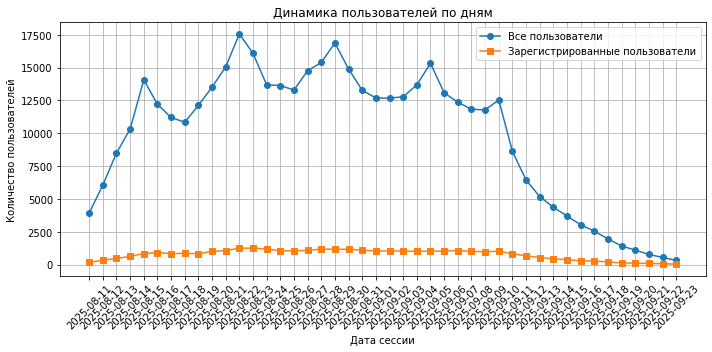

In [ ]:
# Строим график общего числа пользователей и общего числа зарегистрированных пользователей по дням
plt.figure(figsize=(10, 5))
plt.plot(agg_sessions_history['session_date'], agg_sessions_history['unique_users'], marker='o', label='Все пользователи')
plt.plot(agg_sessions_history['session_date'], agg_sessions_history['registered_users'], marker='s', label='Зарегистрированные пользователи')

plt.title('Динамика пользователей по дням')
plt.xlabel('Дата сессии')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

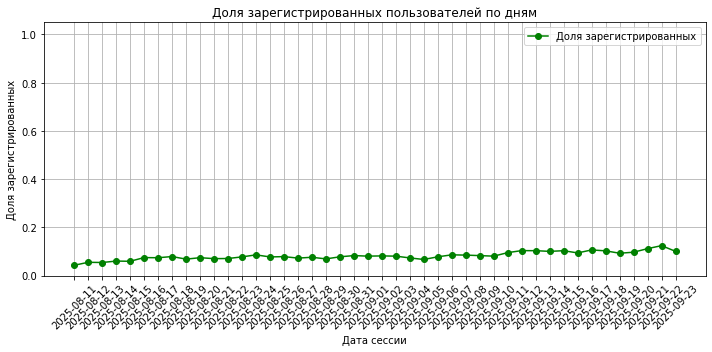

In [ ]:
# Построим отдельный график доли зарегистрированных пользователей от всех пользователей по дням
# Рассчитаем долю зарегистрированных пользователей
agg_sessions_history['registered_share'] = agg_sessions_history['registered_users'] / agg_sessions_history['unique_users']

# График
plt.figure(figsize=(10, 5))
plt.plot(agg_sessions_history['session_date'], agg_sessions_history['registered_share'], marker='o', color='green', label='Доля зарегистрированных')


plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата сессии')
plt.ylabel('Доля зарегистрированных')
plt.ylim(0, 1.05)  # ограничим ось Y от 0 до 1
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

- Зарегистрированных пользователей намного меньше, чем незарегистрированных, более того, их количество не растет со временем, а снижается.

#### 1.4. Анализ числа просмотренных страниц


In [ ]:
#Найдем количество сессий для каждого значения количества просмотренных страниц
sessions_count = sessions_history.groupby('page_counter')['session_id'].count().reset_index()
print(sessions_count)

   page_counter  session_id
0             1       29160
1             2      105536
2             3      166690
3             4      105569
4             5       26288
5             6        2589
6             7          92


<function matplotlib.pyplot.show(close=None, block=None)>

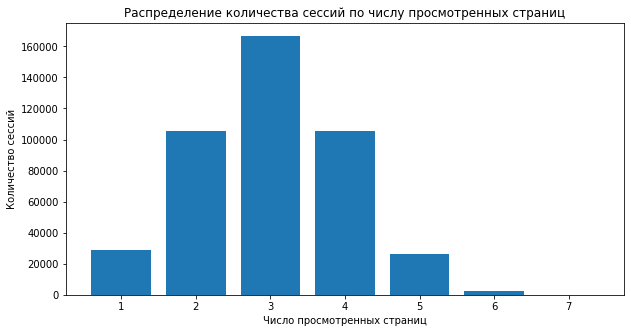

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(sessions_count['page_counter'], sessions_count['session_id'])
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.title('Распределение количества сессий по числу просмотренных страниц')
plt.show

- Страница номер 3 - лидер по просмотрам страниц, а страницы 2 и 4 имеют одинаковое распределение.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц

In [ ]:
#Создадим столбец good_session
# Успешная сессия — 1, если просмотрено ≥ 4 страниц, иначе 0
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

In [ ]:
# Группировка по дате и расчёт средней доли good_session
daily_good_sessions = sessions_history.groupby('session_date').agg(
    good_share=('good_session', 'mean')
).reset_index()

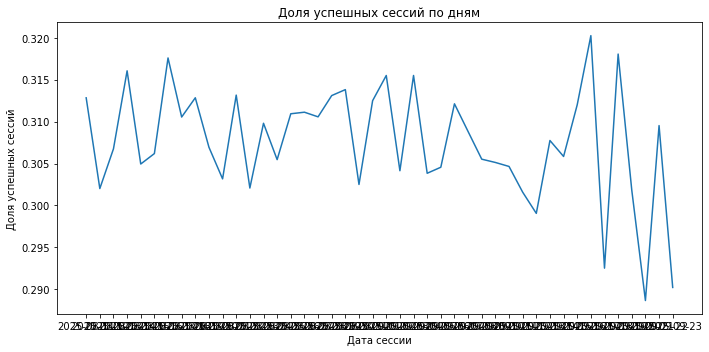

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_good_sessions['session_date'], daily_good_sessions['good_share'])

plt.title('Доля успешных сессий по дням')
plt.xlabel('Дата сессии')
plt.ylabel('Доля успешных сессий')
plt.grid(False)

plt.tight_layout()
plt.show()

- График хорошо показывает, что доля успешных сессий стремительно сокращается в последнее время

### 1) Промежуточные выводы
- Пользователи чаще всего пользуются приложением, не регистрируясь в нем. 
- Доля активных пользователей относительна стабильна, однако доля пользователей, которые просмотрели 4 или более страниц за одну сессию стремительно уменьшается. 
- В среднем пользователи смотрят 3 страницы за сессию, это так же подтверждает то, что при подсчете количества сессий для каждого значения количества просмотренных страниц - 166690 самое большое число (3 страницы).

### 2. Подготовка к тесту

#### 2.1. Расчёт размера выборки

In [ ]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

In [ ]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = ceil(sessions_history.groupby('session_date')['user_id'].nunique().mean()) #ceil для округления в бОльшую сторону, потому что для рассчета людей нужно целое

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil((sample_size / avg_daily_users))

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9908 пользователей в день составит 2 дней


### 2) Промежуточные выводы
- Необходимый размер выборки для каждой группы: 17441
- Длительность теста составит 2 дня
- Будут протестированы 9908 пользователей в день

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

Формула для расчёта процентной разницы:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [ ]:
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [ ]:
# Рассчиатем количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения
unique_users_per_group = sessions_test_part.groupby('test_group')['user_id'].nunique().reset_index()

print("Количество уникальных пользователей по экспериментальным группам за 2025-10-14:")
print(unique_users_per_group)

Количество уникальных пользователей по экспериментальным группам за 2025-10-14:
  test_group  user_id
0          A     1477
1          B     1466


In [ ]:
# Получим количество пользователей в группах A и B
users_A = unique_users_per_group.loc[unique_users_per_group['test_group'] == 'A', 'user_id'].values[0]
users_B = unique_users_per_group.loc[unique_users_per_group['test_group'] == 'B', 'user_id'].values[0]

# Рассчитаем процентную разницу по формуле
P = 100 * (abs(users_A - users_B) / users_A) #abs для модуля в формуле

print(f"Процентная разница в количестве пользователей между группами A и B: {P:.2f}%")

Процентная разница в количестве пользователей между группами A и B: 0.74%


#### 3.2. Проверка пересечений пользователей

In [ ]:
# Получаем множества пользователей каждой группы
users_A = set(sessions_test_part.loc[sessions_test_part['test_group'] == 'A', 'user_id'])
users_B = set(sessions_test_part.loc[sessions_test_part['test_group'] == 'B', 'user_id'])

# Находим пересечение множеств — пользователей в обеих группах
common_users = users_A.intersection(users_B)

# Выводим результат
if len(common_users) == 0:
    print("Пользователи в группах A и B не пересекаются — группы независимы.")
else:
    print(f"В группах A и B одновременно встречаются {len(common_users)} пользователей:")
    print(common_users)

Пользователи в группах A и B не пересекаются — группы независимы.


#### 3.3. Равномерность разделения пользователей по устройствам



In [ ]:
group_A = sessions_test_part[sessions_test_part['test_group'] == 'A']
group_B = sessions_test_part[sessions_test_part['test_group'] == 'B']

In [ ]:
# Доли типов устройств
device_share_A = group_A['device'].value_counts(normalize=True).sort_values(ascending=False)
device_share_B = group_B['device'].value_counts(normalize=True).sort_values(ascending=False)

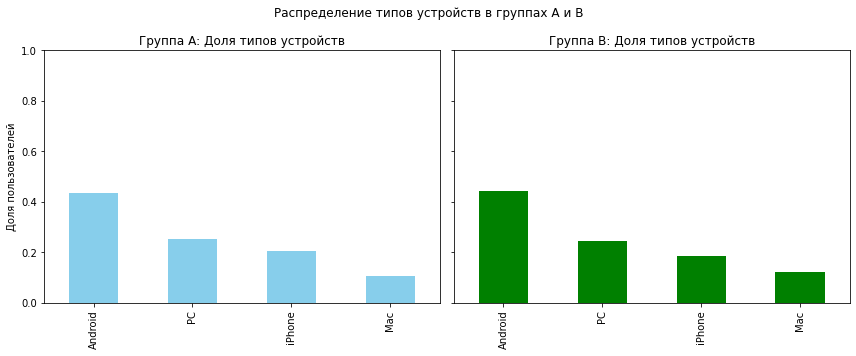

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

device_share_A.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Группа A: Доля типов устройств')
axes[0].set_ylabel('Доля пользователей')
axes[0].set_ylim(0, 1)

device_share_B.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Группа B: Доля типов устройств')
axes[1].set_ylim(0, 1)

plt.suptitle('Распределение типов устройств в группах A и B')
plt.tight_layout()
plt.show()

In [ ]:
# Графики получились почти одинаковыми, проверим, правильно ли они составлены на числах
print("Доли устройств в группе A:")
print(device_share_A)

print("\nДоли устройств в группе B:")
print(device_share_B)

Доли устройств в группе A:
Android    0.436751
PC         0.252330
iPhone     0.204394
Mac        0.106525
Name: device, dtype: float64

Доли устройств в группе B:
Android    0.444103
PC         0.246929
iPhone     0.187961
Mac        0.121007
Name: device, dtype: float64


- На графиках мы видим, что доли почти одинаковы, однако если смотреть на числа, то можно увидеть небольшую разницу

#### 3.5. Вывод после проверки A/B-теста


### 3) Промежуточные выводы
- Процентная разница в количестве пользователей между группами A и B составила 0.74%. В группе А было на 11 пользователей больше,
- Пользователи в группах A и B не пересекаются — группы независимы,
- Равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным сохраняется, значительные различия не наблюдаются.

A/B-тест проходит корректно, потому что группы разделены равномерно и пользователи двух групп не пересекаются.

### 4. Проверка результатов A/B-теста


#### 4.1. Получение результатов теста и подсчёт основной метрики


In [ ]:
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

In [ ]:
#Создадим столбец good_session
# Успешная сессия — 1, если просмотрено ≥ 4 страниц, иначе 0
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

In [ ]:
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста


In [ ]:
users_per_group = sessions_test.groupby(['session_date','test_group'])['session_id'].nunique().reset_index()
print(users_per_group)

   session_date test_group  session_id
0    2025-10-14          A        1502
1    2025-10-14          B        1628
2    2025-10-15          A        2235
3    2025-10-15          B        2283
4    2025-10-16          A        3280
5    2025-10-16          B        3241
6    2025-10-17          A        4089
7    2025-10-17          B        4054
8    2025-10-18          A        5013
9    2025-10-18          B        5059
10   2025-10-19          A        6535
11   2025-10-19          B        6779
12   2025-10-20          A        5837
13   2025-10-20          B        6089
14   2025-10-21          A        3927
15   2025-10-21          B        3981
16   2025-10-22          A        3083
17   2025-10-22          B        3111
18   2025-10-23          A        2470
19   2025-10-23          B        2548
20   2025-10-24          A        2090
21   2025-10-24          B        2068
22   2025-10-25          A        1897
23   2025-10-25          B        1814
24   2025-10-26          

In [ ]:
#Применим тест Манна-Уитни
#Нулевая гипотеза: Различий нет, Альтернативная гипотеза: различия есть
from scipy.stats import mannwhitneyu

a = users_per_group[users_per_group['test_group'] == 'A']['session_id']
b = users_per_group[users_per_group['test_group'] == 'B']['session_id']

alpha = 0.05
mw_test = mannwhitneyu(
    a,
    b,
    alternative ='two-sided')

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue}>{alpha}')
    print('Количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы')

else:
    print(f'pvalue={mw_test.pvalue}<{alpha}')
    print('Количество уникальных дневных сессий в двух выборках различается')

pvalue=0.8817307917391243>0.05
Количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы


#### 4.3. Сравнение доли успешных сессий


In [ ]:
group_good_share = sessions_test.groupby('test_group')['good_session'].mean()
print(group_good_share)

test_group
A    0.307723
B    0.318290
Name: good_session, dtype: float64


In [ ]:
# Найдем разницу значений
share_A = group_good_share.get('A', 0)
share_B = group_good_share.get('B', 0)

diff = share_B - share_A

print(f"Доля успешных сессий в группе A: {share_A:.2%}")
print(f"Доля успешных сессий в группе B: {share_B:.2%}")
print(f"Разница в долях (B - A): {diff:.2%}")

Доля успешных сессий в группе A: 30.77%
Доля успешных сессий в группе B: 31.83%
Разница в долях (B - A): 1.06%


**Разница составляет 1.06%. Доля успешных сессий в группе В больше, чем в группе А**

#### 4.4. Насколько статистически значимо изменение ключевой метрики


In [ ]:
# Разделим данные на группы
group_A = sessions_test[sessions_test['test_group'] == 'A']['good_session']
group_B = sessions_test[sessions_test['test_group'] == 'B']['good_session']

# Применим тест Манна-Уитни
alpha = 0.05
mw_test = mannwhitneyu(
    group_A,
    group_B,
    alternative ='two-sided')

print(f'p-value: {mw_test.pvalue:.4}') #Сократим до 4 знаков после запятой

if mw_test.pvalue < alpha:
    print(f'Разница статистически значима (p < {alpha})')
else:
    print(f'Нет статистически значимой разницы (p >= {alpha})')

p-value: 0.000315
Разница статистически значима (p < 0.05)


#### 4.5. Вывод по результатам A/B-эксперимента


### 4) Вывод по результатам эксперимента
**Характеристики**
- Тип: А/В
- Цель: оценить новый алгоритм рекомендаций
- Длительность: 2 дня
- Количество задействованных пользователей: 9908/день

**Влияние нового алгоритма рекомендаций на рост ключевой метрики**
- В тестовой группе B доля успешных сессий оказалась на 1.06% выше, чем в контрольной группе A
- Это свидетельствует о положительном эффекте от внедрения нового алгоритма

**Статистическая значимость результата**
- Полученное значение p-value = 0.000315

**Рекомендация**
- Нарушений в данных нет
- Разница в метрике статистически значима
- Направление эффекта положительное (рост успешных сессий в группе В)
- Вывод: Рекомендуется внедрить новый алгоритм рекомендаций в приложение